In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose

In [78]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_diagonal, make_gmm_program_diagonal_batched
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [113]:
N = 50
P = 5
K = 3
BATCH_SIZE = 1024
N_EPOCHS = 1
N_SAMPLES_PER_EPOCH = 500_000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [114]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(P)),
    ("k", curriculum.constant_scheduler(K)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("a1", curriculum.constant_scheduler(5.0)),
    ("b1", curriculum.constant_scheduler(2.0)),
    ("dirichlet_beta", curriculum.constant_scheduler(0.5)),
    ("lambda1", curriculum.constant_scheduler(5.0))
])
#curriculum.plot_all_schedules()

In [115]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_gmm_program_diagonal_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [116]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 499712 and 249856 respectively


In [117]:
sample_batch = next(iter(epoch_loader[0][0]))

In [84]:
for key, value in sample_batch.items():
    print(key, value.shape)

phi torch.Size([1024, 3])
mu torch.Size([1024, 15])
sigma_squared torch.Size([1024, 15])
z torch.Size([1024, 10])
x torch.Size([1024, 10, 5])
beta torch.Size([1024, 30])
time torch.Size([1024])
base_sample_beta torch.Size([1024, 30])


####################################################################################################
Epoch 0


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


{'X': {'mean': tensor(0.1122), 'variance': tensor(9.0100), 'min': tensor(-24.3898), 'max': tensor(19.5825), 'mean_mean': tensor([0.0627, 0.0639, 0.3441, 0.0258, 0.0647]), 'variance_mean': tensor([4.2522, 4.8322, 4.1582, 4.3600, 3.8109]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2912), 'variance': tensor(4.3240), 'min': tensor(-24.6185), 'max': tensor(17.4163), 'mean_mean': tensor(0.2912), 'variance_mean': tensor(4.3628), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3137, 0.3282, 0.3581])
Variance: tensor([0.0857, 0.0903, 0.1015])
Min: tensor([2.4577e-07, 2.3273e-06, 1.1892e-05])
Max: tensor([0.9889, 0.9846, 1.0000])
Mean of means: 0.333333283662796
Mean of variances: 0.13874109089374542
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.1445,  0.1858,  0.2254, -0.0866,  0.4663, -0.0643, -0.1529,  0.0983,
         0.1622,  0.2332, -0.1775,  0.1921,  0.3424, -0.0975, -0.3082])
Variance: tensor([10.4474,  9

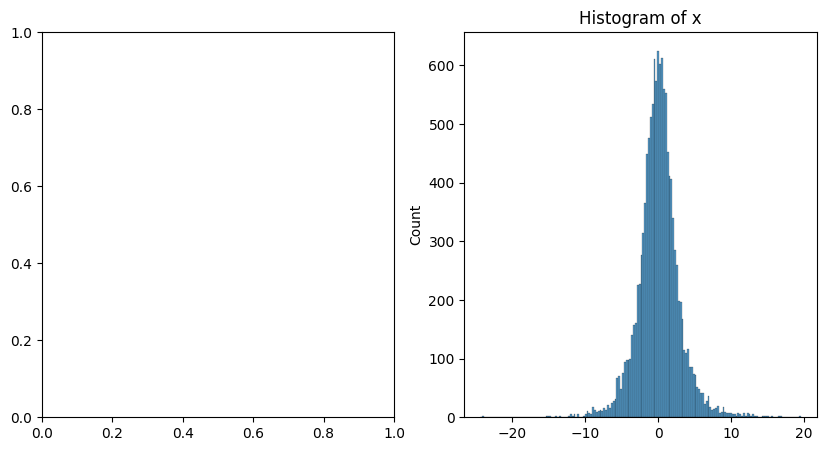

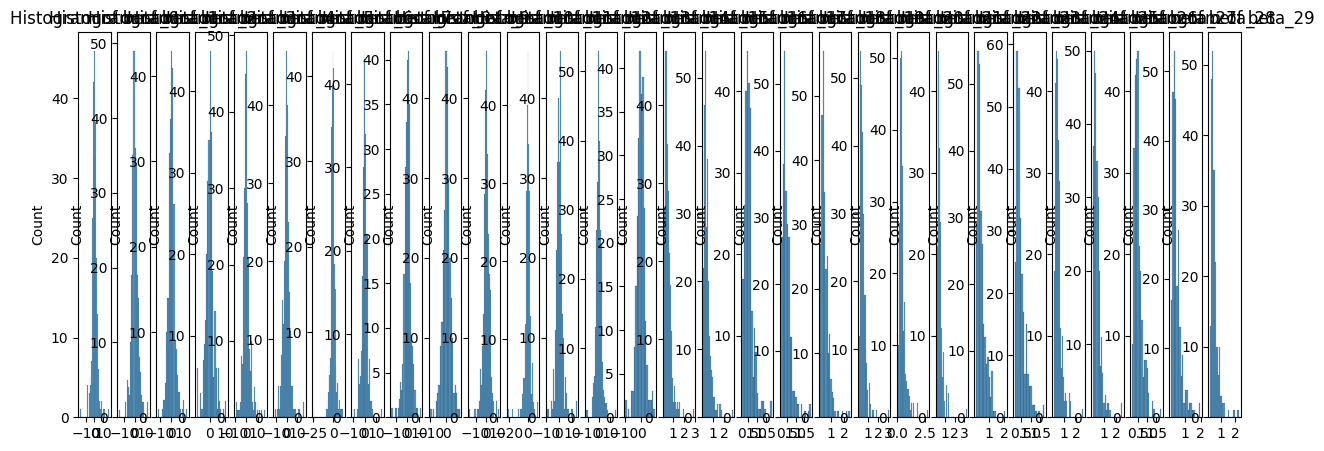

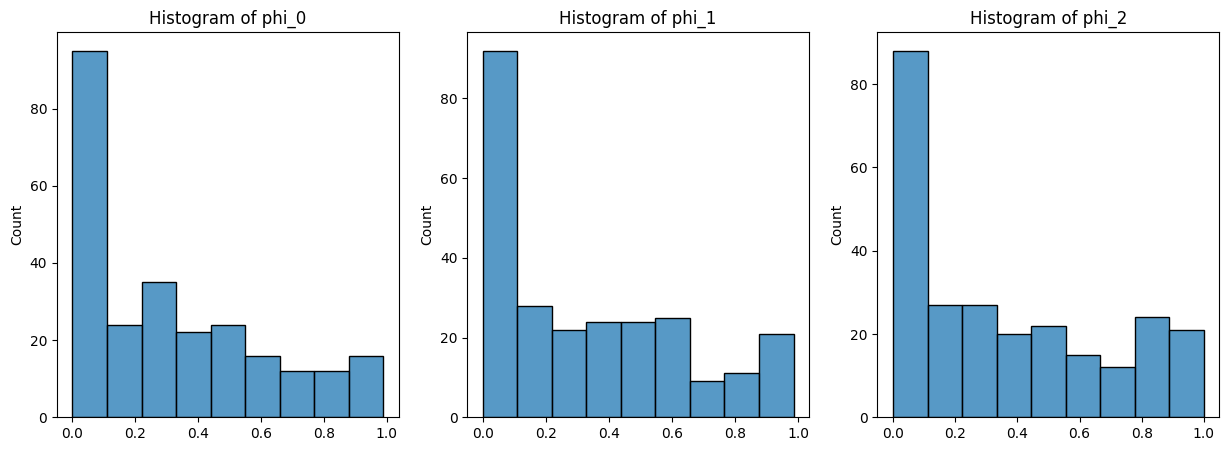

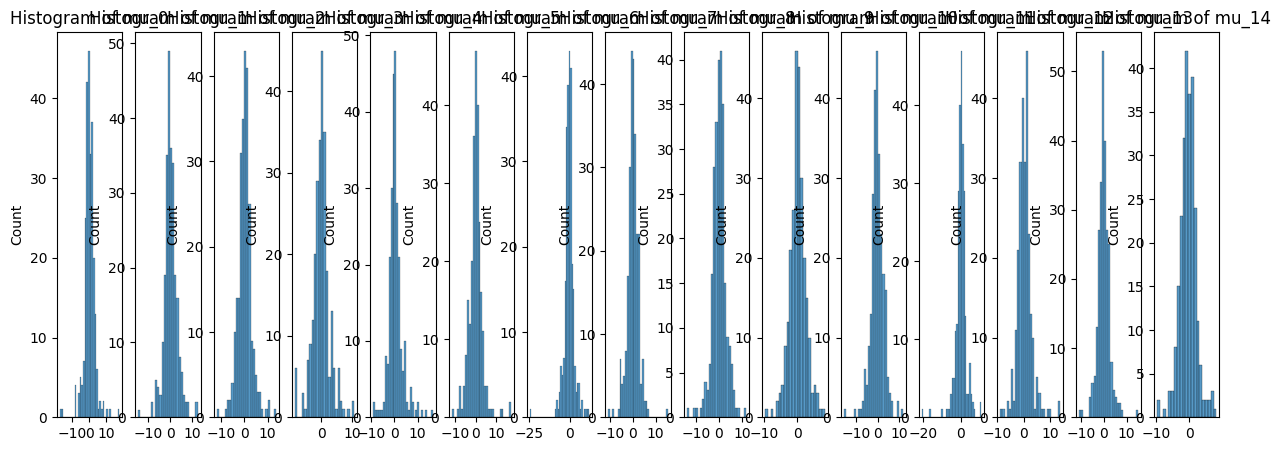

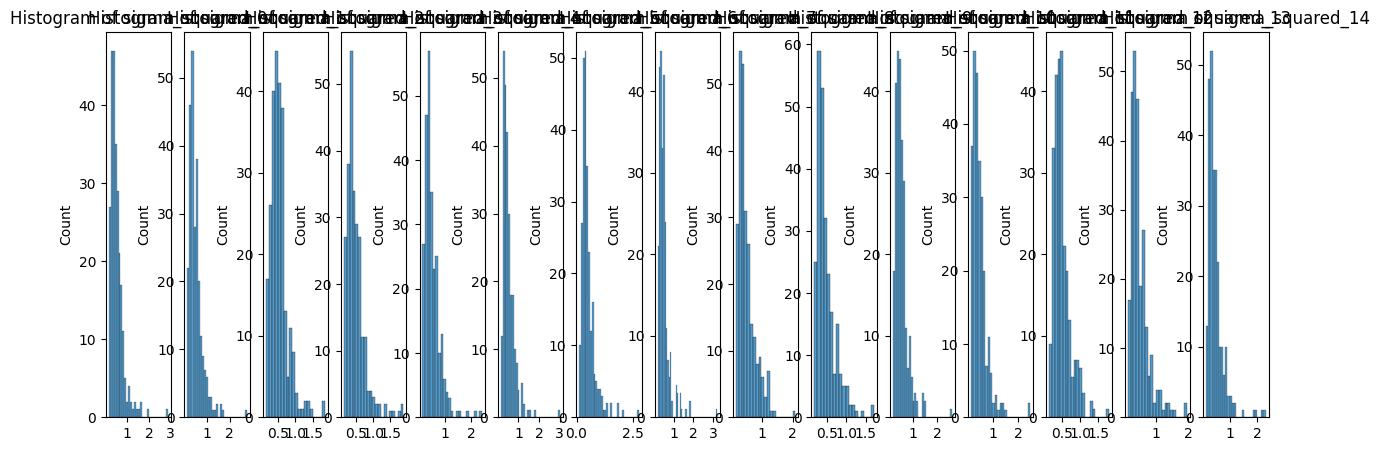

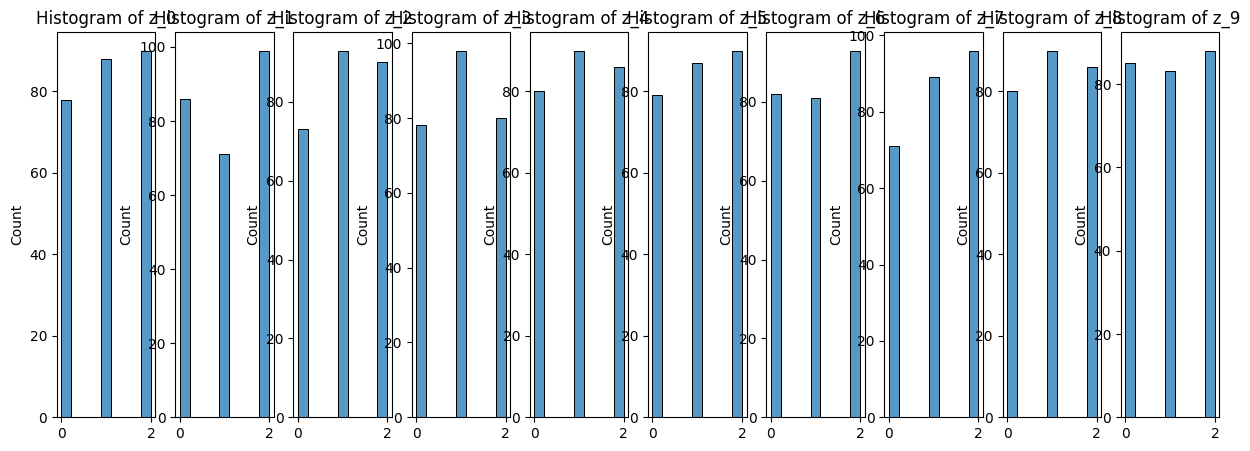

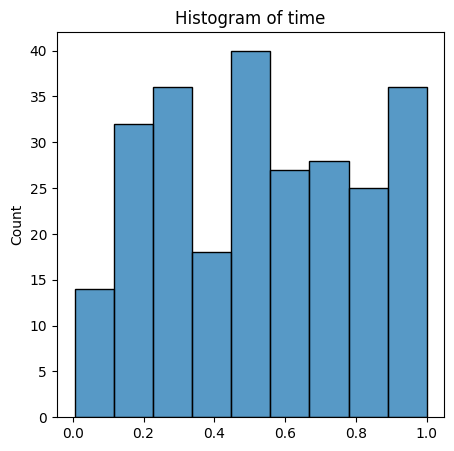

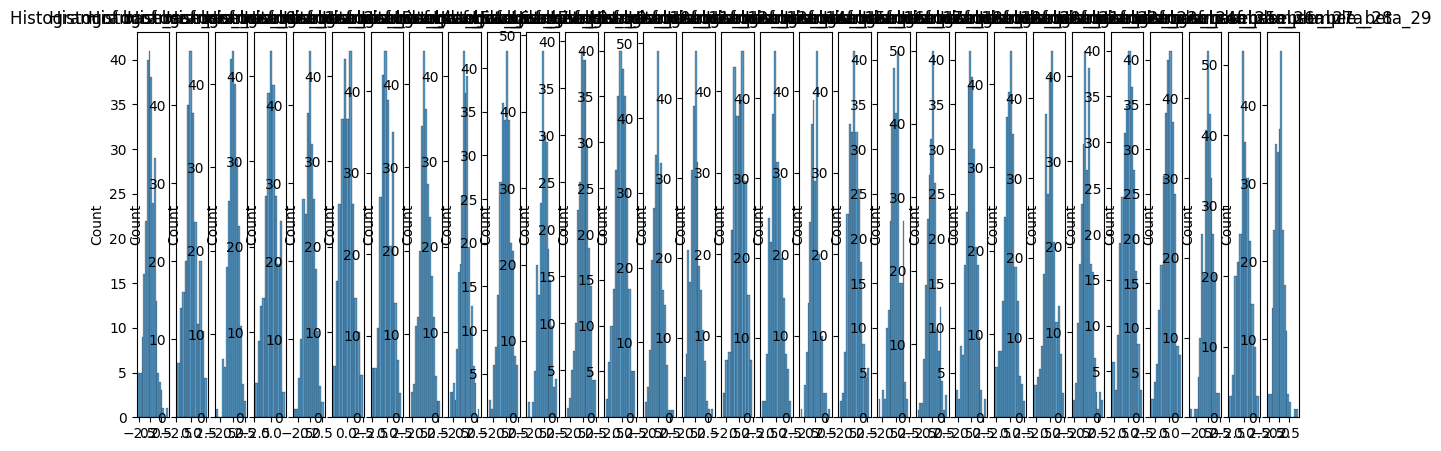

####################################################################################################
Epoch 0


100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


{'X': {'mean': tensor(0.0270), 'variance': tensor(8.7991), 'min': tensor(-19.7559), 'max': tensor(23.7372), 'mean_mean': tensor([-0.0311, -0.0803,  0.1726,  0.0920, -0.0181]), 'variance_mean': tensor([3.5897, 3.3991, 3.5813, 3.3877, 3.3313]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2392), 'variance': tensor(3.9966), 'min': tensor(-22.1851), 'max': tensor(21.9382), 'mean_mean': tensor(0.2392), 'variance_mean': tensor(4.0800), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3119, 0.3560, 0.3321])
Variance: tensor([0.0844, 0.0918, 0.0933])
Min: tensor([4.2207e-05, 8.8156e-08, 4.2596e-05])
Max: tensor([0.9545, 0.9901, 0.9997])
Mean of means: 0.333333283662796
Mean of variances: 0.13471540808677673
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.1220, -0.3171,  0.1258, -0.1517,  0.0604, -0.3368,  0.0229,  0.3993,
         0.0748,  0.2272,  0.0057, -0.3188, -0.1283,  0.0751, -0.0754])
Variance: tensor([7.4364

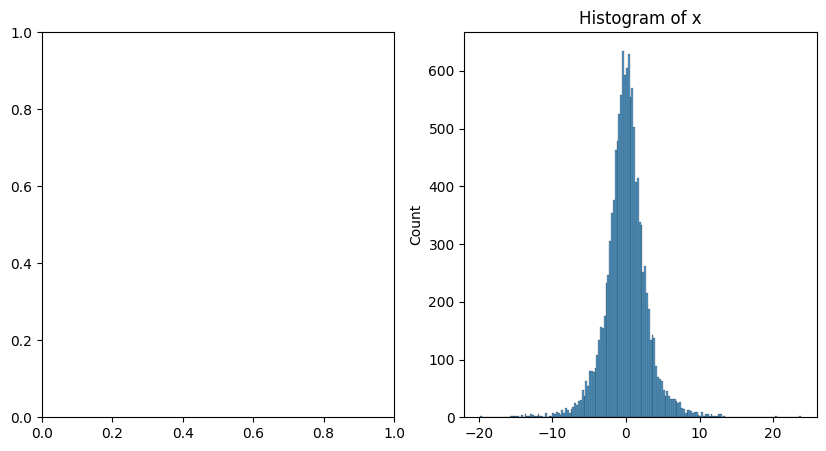

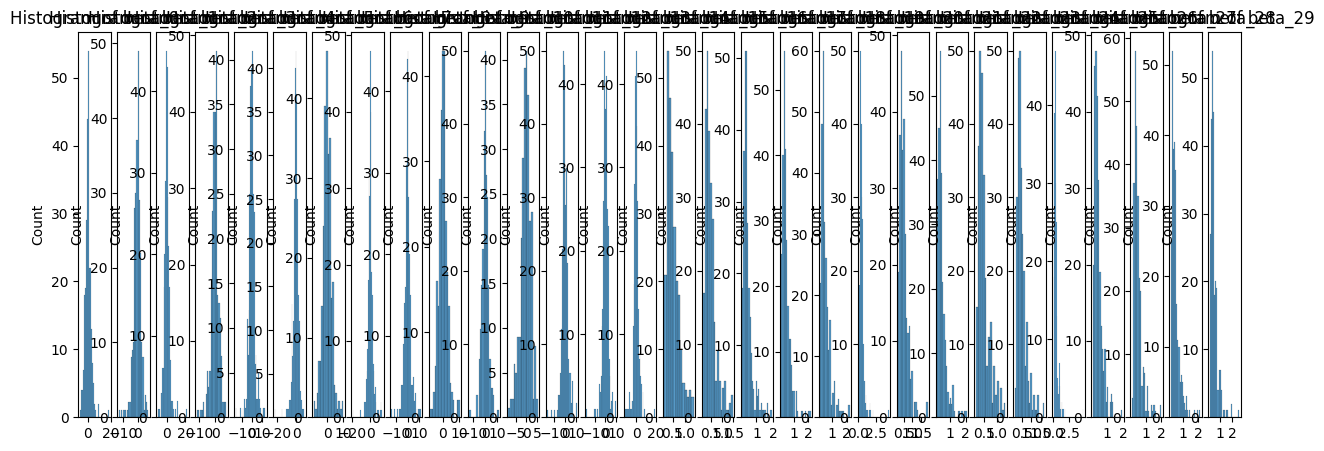

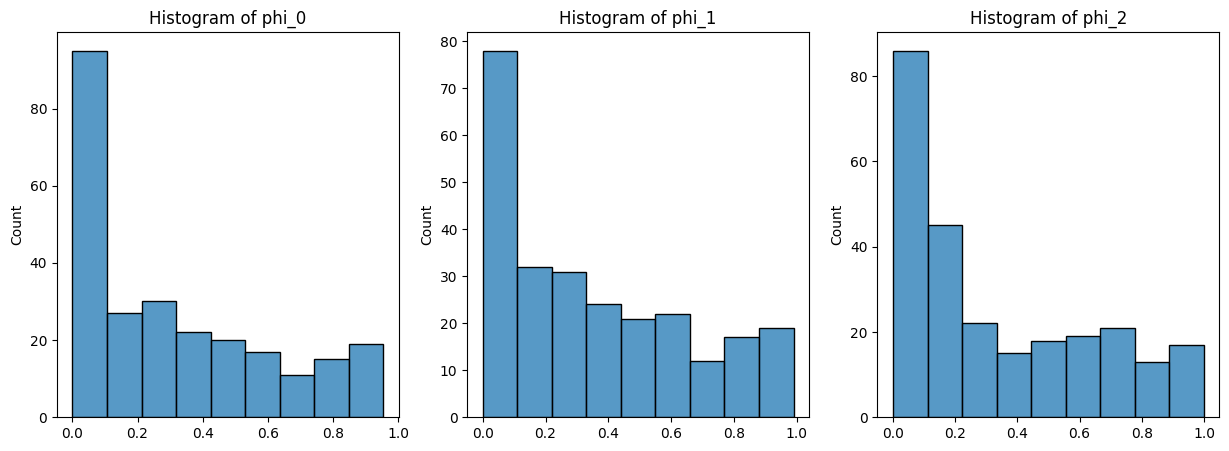

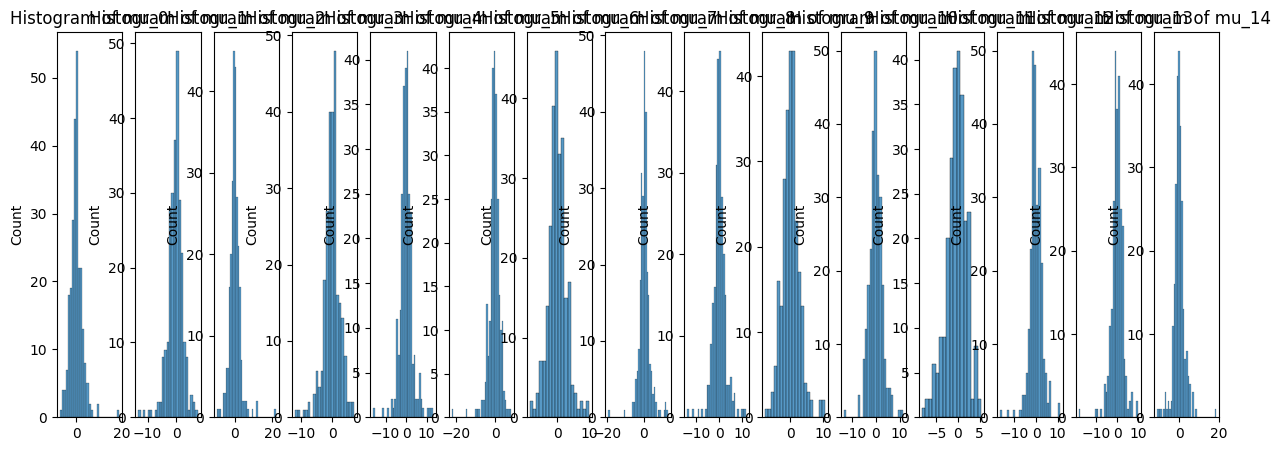

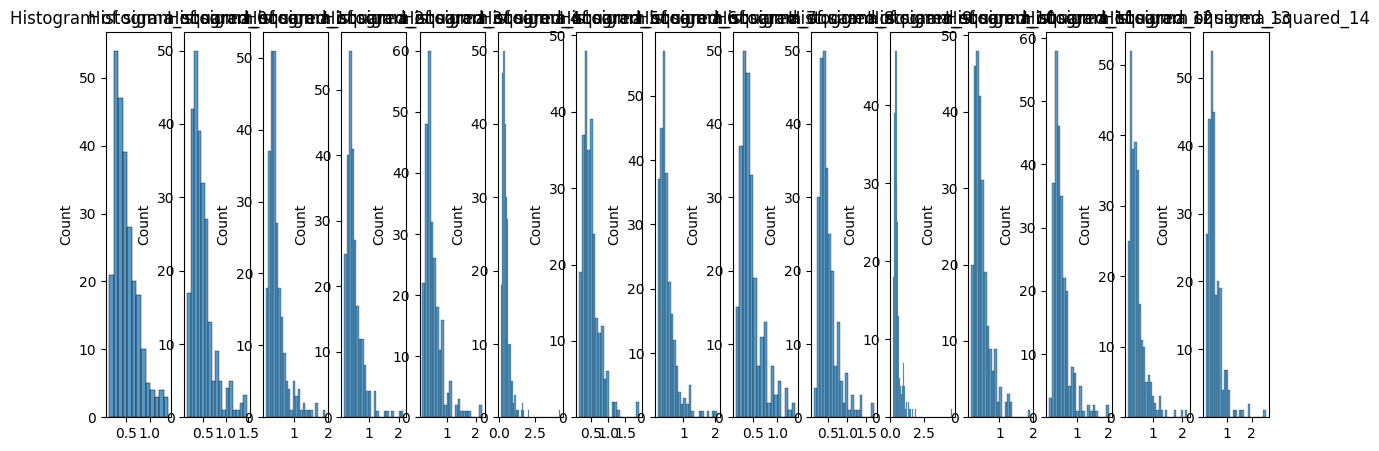

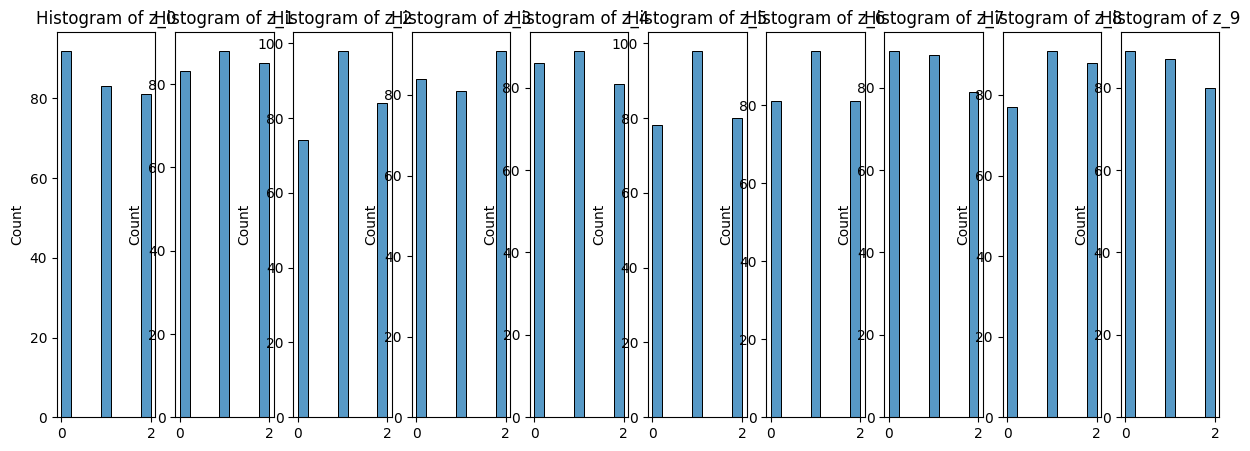

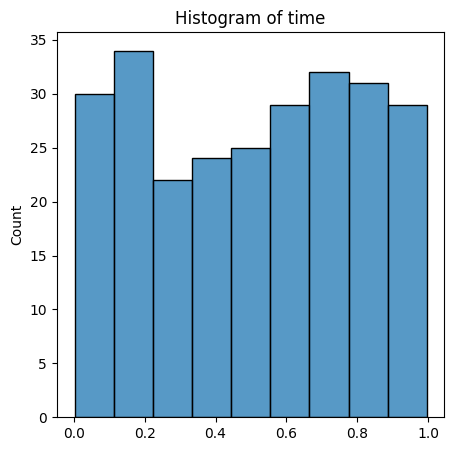

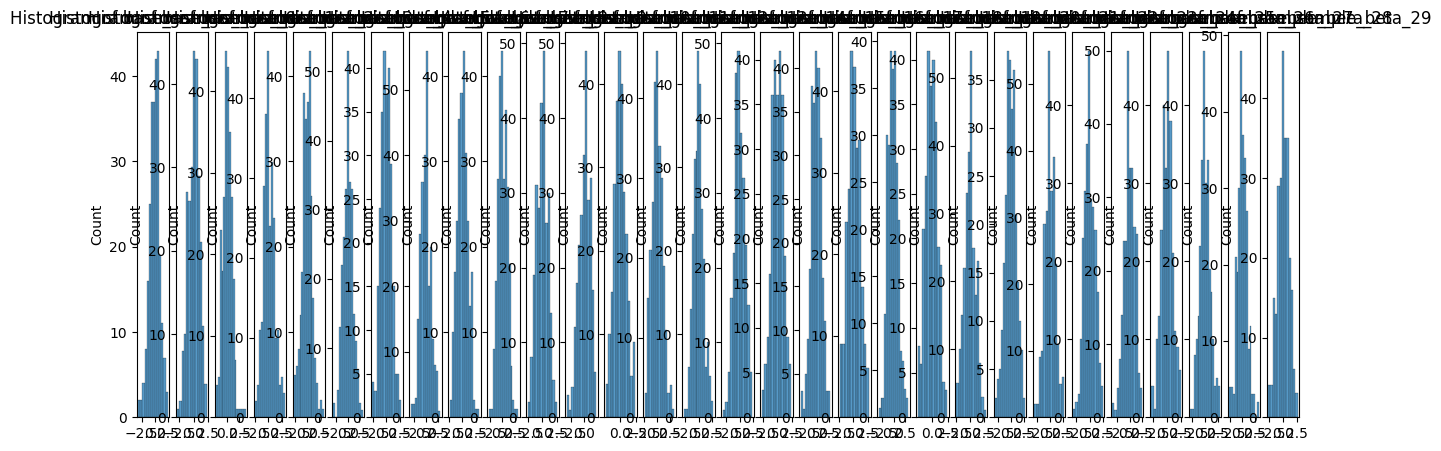

[{'X': {'mean': tensor(0.1122),
   'variance': tensor(9.0100),
   'min': tensor(-24.3898),
   'max': tensor(19.5825),
   'mean_mean': tensor([0.0627, 0.0639, 0.3441, 0.0258, 0.0647]),
   'variance_mean': tensor([4.2522, 4.8322, 4.1582, 4.3600, 3.8109]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2912),
   'variance': tensor(4.3240),
   'min': tensor(-24.6185),
   'max': tensor(17.4163),
   'mean_mean': tensor(0.2912),
   'variance_mean': tensor(4.3628),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(0.0270),
   'variance': tensor(8.7991),
   'min': tensor(-19.7559),
   'max': tensor(23.7372),
   'mean_mean': tensor([-0.0311, -0.0803,  0.1726,  0.0920, -0.0181]),
   'variance_mean': tensor([3.5897, 3.3991, 3.5813, 3.3877, 3.3313]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2392),
   'variance': tensor(3.9966),
   'min': tensor(-22.1851),
   'max': tensor(21.9382),
   'mean_mean': tensor(0.2392),
   'variance_me

In [85]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 1
)

In [86]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 499712 and 249856 respectively


In [87]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['phi', 'mu', 'sigma_squared', 'z', 'x', 'beta', 'time', 'base_sample_beta'])

In [88]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([1024, 10, 5]), torch.Size([1024, 30]))

In [89]:
2*K

6

In [90]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = P,
    n_input_features_decoder = 2*P*K,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P*K,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [91]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [92]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [93]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [94]:
trainer.validate()

100%|██████████| 49/49 [00:39<00:00,  1.23it/s]


{'loss_mean': 5.400150775909424,
 'loss_median': 5.409434795379639,
 'loss_std': 0.12527230381965637}

In [95]:
r = trainer.train()

Curriculum parameters: {'n': 10, 'p': 5, 'k': 3, 'batch_size': 1024, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 0.5, 'lambda1': 5.0} at iteration 0


100%|██████████| 49/49 [00:44<00:00,  1.11it/s]


Epoch 0:
Training: {'loss_mean': 5.467252254486084, 'loss_median': 5.40160608291626, 'loss_std': 0.2832909822463989}
Validation: {'loss_mean': 5.241252899169922, 'loss_median': 5.249823093414307, 'loss_std': 0.14701497554779053}
Validation curriculum: {'loss_mean': 5.2421770095825195, 'loss_median': 5.232054710388184, 'loss_std': 0.15668167173862457}
Time: 215.70754742622375
Learning rate: [0.0002916507025541063]


----------------------------------------------------------------------------------------------------
Saving model


  0%|          | 0/196 [00:19<?, ?it/s]


KeyboardInterrupt: 

In [96]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (2*P*K,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 10,
    rtol = 10,
    #device = torch.device("cpu")
)

benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_gmm_program_diagonal(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 10, 'p': 5, 'k': 3, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 0.5, 'lambda1': 5.0}


In [97]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [98]:
x_test.shape

torch.Size([1024, 10, 5])

In [99]:
samples = full_model.sample_posterior(x_test[0])

0it [00:00, ?it/s]


In [100]:
samples["beta"].shape

torch.Size([1000, 30])

In [101]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_x,
    n_samples=500,
    n_warmup=1000
)

models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 500)

In [110]:
"""
evaluation = Evaluate(
    posterior_model = models[1],
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)
"""

evaluation = Evaluate(
    posterior_model = models[1],
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_posterior_model = result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [111]:
evaluation.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:48<00:48, 48.16s/it]

....................


 53%|█████▎    | 53/100 [00:00<00:00, 520.33it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 530.75it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.


100%|██████████| 100/100 [00:00<00:00, 664.54it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

,Model,GT,Mean_joint_Wasserstein_distance with metric euclidean,Mean_joint_MMD,Mean_joint_cst_roc_auc,Mean_gt_parameter_Perplextiy,Mean_gt_parameter_MAP diff,Mean_gt_parameter_Mean diff,Std_joint_Wasserstein_distance with metric euclidean,Std_joint_MMD,Std_joint_cst_roc_auc,Std_gt_parameter_Perplextiy,Std_gt_parameter_MAP diff,Std_gt_parameter_Mean diff
0,Variational Inference with guide: _bound_parti...,gt,34.890364,2.736794,NaN,-392.563206,1.548854,1.569027,0.212730,0.000846,NaN,470.426504,0.900151,0.947158
1,Hamiltonian Monte Carlo,gt,35.010284,2.761274,NaN,-1011.509488,1.282168,1.258346,0.182938,0.014861,NaN,980.428510,0.729942,0.726582


P-values:


,Model 1,Model 2,joint_Wasserstein_distance with metric euclidean_p-value,joint_MMD_p-value,joint_cst_roc_auc_p-value,gt_parameter_Perplextiy_p-value,gt_parameter_MAP diff_p-value,gt_parameter_Mean diff_p-value
0,Variational Inference with guide: _bound_parti...,Hamiltonian Monte Carlo,1.0,0.5,NaN,0.5,0.5,0.5



Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,Variational Inference with guide: _bound_parti...,Hamiltonian Monte Carlo,13.175258,3.842859,1.0,3.416204,0.670834,0.0


P-values:


""


{'summarized_results': {'comparison_to_gt':                                                Model  GT  \
  0  Variational Inference with guide: _bound_parti...  gt   
  1                            Hamiltonian Monte Carlo  gt   
  
     Mean_joint_Wasserstein_distance with metric euclidean  Mean_joint_MMD  \
  0                                          34.890364            2.736794   
  1                                          35.010284            2.761274   
  
     Mean_joint_cst_roc_auc  Mean_gt_parameter_Perplextiy  \
  0                     NaN                   -392.563206   
  1                     NaN                  -1011.509488   
  
     Mean_gt_parameter_MAP diff  Mean_gt_parameter_Mean diff  \
  0                    1.548854                     1.569027   
  1                    1.282168                     1.258346   
  
     Std_joint_Wasserstein_distance with metric euclidean  Std_joint_MMD  \
  0                                           0.212730          0.000846   

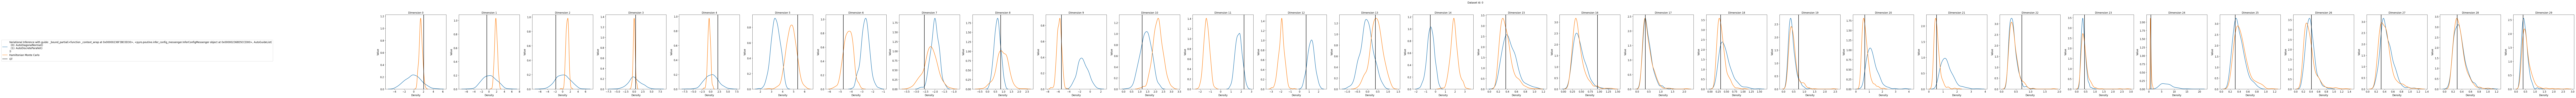

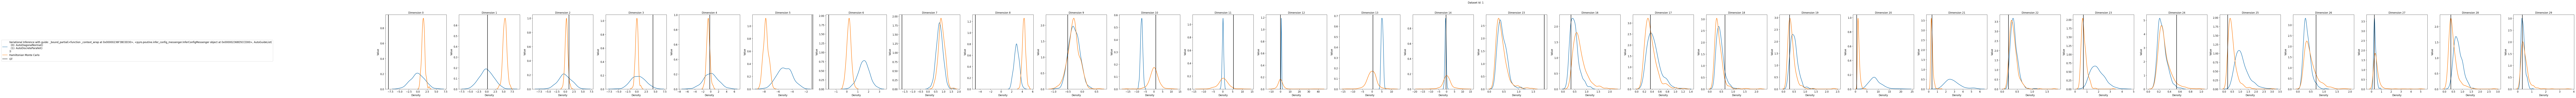

In [112]:
evaluation.plot_results()

In [105]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [106]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [107]:
comparison_models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [108]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = comparison_models[1:3],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [109]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:51<00:51, 51.04s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

...

Sampling posterior:   0%|          | 0/2 [00:07<?, ?it/s]


KeyboardInterrupt: 